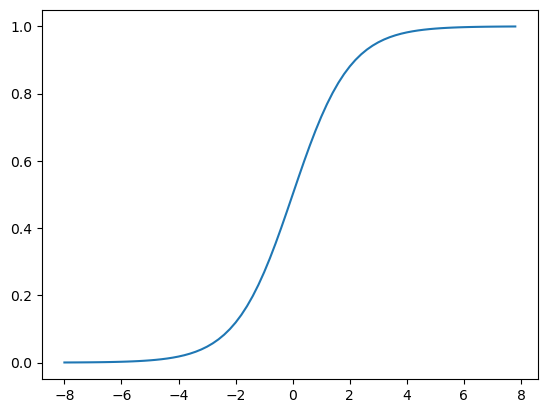

In [1]:
import numpy as np
import matplotlib.pyplot as plt
 
# 利用 numpy 实现 Sigmoid 函数
def sigmoid(x):
    # x 为输入值
    # y = sigmoid(x)
    y=1/(1+np.exp(-x))
    #dy=y*(1-y)  # 若要实现 Sigmod() 的导数图像，打开此处注释，并返回 dy 值即可。 
    return y
 
# 利用 matplotlib 来进行画图
def plot_sigmoid():
    # param:起点，终点，间距
    x = np.arange(-8, 8, 0.2)
    y = sigmoid(x)
    plt.plot(x, y)
    plt.show()
 
 
if __name__ == '__main__':
    plot_sigmoid()

In [17]:
import numpy as np
from sklearn import linear_model
def f(x):
    return 9*x+8
x=np.linspace(0,10,30)
y=f(x)+np.random.rand(30)
reg = linear_model.LinearRegression()
x=x.reshape(-1,1)
reg.fit(x,y)
print(reg.coef_)


[8.99558658]


## 11.5

需要完成的模块：

sigmoid : 映射到概率的函数

model : 返回预测结果值

cost : 根据参数计算损失

gradient : 计算每个参数的梯度方向

descent : 进行参数更新

accuracy: 计算精度

In [10]:
#导入数据
import numpy as np
def loaddata(file, delimeter):
    #以delimeter为分隔符导入file数据
    data = np.loadtxt(file, delimiter=delimeter)
    print('Dimensions: ',data.shape)
    # 打印数据前6行
    print(data[1:6,:])
    return(data)

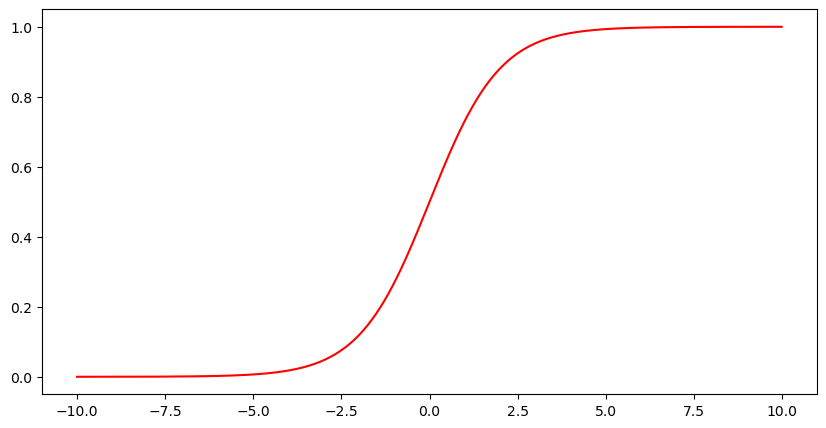

In [4]:
#sigmoid函数
def sigmoid(z):
    return 1 / (1 + np.exp(-z))
 
nums = np.arange(-10, 10, step=0.01)
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(nums, sigmoid(nums), 'r')
plt.show()

In [5]:
#model函数
def model(X, W):    
    return sigmoid(np.dot(X, W))

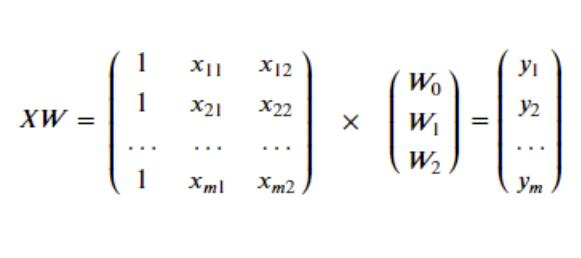

In [7]:
#损失函数
def Loss(X, y, W):
    left = np.multiply(y, np.log(model(X, W)))
    right = np.multiply(1 - y, np.log(1 - model(X, W)))
    return -np.sum(left + right) / (len(X))

In [8]:
#梯度函数
def Gradient(X, y, W):
    grad = np.zeros(W.shape)
    error = (model(X, W)- y)
    grad = np.dot(X.T, error)/len(X)
    
    return grad


In [11]:
#梯度下降
STOP_ITER = 0
STOP_COST = 1
STOP_GRAD = 2
 
def stopCriterion(type, value, threshold):
    #设定三种不同的停止策略
    if type == STOP_ITER:   #
        return value > threshold
    elif type == STOP_COST:
        return abs(value[-1]-value[-2]) < threshold
    elif type == STOP_GRAD:
        return np.linalg.norm(value) < threshold

def shuffleData(data):
    np.random.shuffle(data)
    cols = data.shape[1]
    X = data[:, 0:cols-1]
    y = data[:, cols-1:]
    return X, y

import time
 
def descent(data, W, batchSize, stopType, thresh, alpha):
    #梯度下降求解
    
    init_time = time.time()
    i = 0 # 迭代次数
    k = 0 # batch
    X, y = shuffleData(data)
    grad = np.zeros(W.shape) # 计算的梯度
    costs = [Loss(X, y, W)] # 损失值
 
    
    while True:
        grad = Gradient(X[k:k+batchSize], y[k:k+batchSize], W)
        k += batchSize #取batch数量个数据
        if k >= n: 
            k = 0 
            X, y = shuffleData(data) #重新洗牌
        W = W - alpha*grad # 参数更新
        costs.append(Loss(X, y, W)) # 计算新的损失
        i += 1 
 
        if stopType == STOP_ITER:       
            value = i
        elif stopType == STOP_COST:     
            value = costs
        elif stopType == STOP_GRAD:     
            value = grad
        if stopCriterion(stopType, value, thresh):
            break
    
    return W, i-1, costs, grad, time.time() - init_time

def runExpe(data, W, batchSize, stopType, thresh, alpha):
    #import pdb; pdb.set_trace();
    W, iter, costs, grad, dur = descent(data, W, batchSize, stopType, thresh, alpha)
    
    name = "Original" if (data[:,1]>2).sum() > 1 else "Scaled"
    name += " data - learning rate: {} - ".format(alpha)
    if batchSize==n: strDescType = "Gradient"
    elif batchSize==1:  strDescType = "Stochastic"
    else: strDescType = "Mini-batch ({})".format(batchSize)
    name += strDescType + " descent - Stop: "
    if stopType == STOP_ITER: strStop = "{} iterations".format(thresh)
    elif stopType == STOP_COST: strStop = "costs change < {}".format(thresh)
    else: strStop = "gradient norm < {}".format(thresh)
    name += strStop
    print ("***{}\nW: {} - \nIter: {} - Last cost: {:03.2f} - Duration: {:03.2f}s".format(
        name, W, iter, costs[-1], dur))
    fig, ax = plt.subplots(figsize=(12,4))
    ax.plot(np.arange(len(costs)), costs, 'r')
    ax.set_xlabel('Iterations')
    ax.set_ylabel('Cost')
    ax.set_title(name.upper() + ' - Error vs. Iteration')
    return W

In [13]:
#设定迭代次数
n=100

In [ ]:
#根据损失值停止

## 11.6

In [15]:
#导入数据集
from sklearn import datasets
import random
from sklearn.model_selection import train_test_split


#查看数据
iris = datasets.load_iris()
print(iris)


{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [16]:
#打乱数据
x = iris['data']
y = iris['target']
#打乱鸢尾花数据集
id = [i for i in range(0,len(x))]
random.shuffle(id)
x_copy = x.copy()
y_copy = y.copy()
for j in range(0,len(x)):
    x[j] = x_copy[id[j]]
    y[j] = y_copy[id[j]]


In [17]:
#分割数据集
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.7)


## 11.7

In [20]:
import numpy as np
from sklearn import datasets
from sklearn.linear_model import LogisticRegression

# 加载鸢尾花数据集
iris = datasets.load_iris()
# 以鸢尾花数据的最后一个特征拿来进行预测
X = iris['data'][:, 3:]
# 因为要做二分类，原始数据是3个种类，将第一二归为一类，第三类归为一类
y = (iris['target'] == 2).astype(int)
# 导入逻辑回归模型
multi_classifier = LogisticRegression(solver='sag',max_iter=1000,multi_class='multinomial')
# 训练模型
multi_classifier.fit(X, y)

# 我们创建1000个样本来进行模型预测
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
# 打印模型预测各个数据的概率
y_proba = multi_classifier.predict_proba(X_new)
print(y_proba)
# 打印模型预测的种类
y_hat = multi_classifier.predict(X_new)
print(y_hat)

[[9.99895723e-01 1.04276563e-04]
 [9.99893972e-01 1.06027846e-04]
 [9.99892191e-01 1.07808537e-04]
 ...
 [5.87793507e-04 9.99412206e-01]
 [5.78089407e-04 9.99421911e-01]
 [5.68545425e-04 9.99431455e-01]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

## 11.8

In [21]:
import numpy as np

from sklearn import datasets


def FCM(X, c_clusters=3, m=2, eps=1e-2):
    # 随机二维数组shape(150,3)，初始化隶属度矩阵
    membership_mat = np.random.random((len(X), c_clusters))
    # 使Xi的隶属度总和为1，即Xi隶属于每个类别的数值求和为1
    membership_mat = np.divide(membership_mat, np.sum(membership_mat, axis=1)[:, np.newaxis])

    while True:
        # 超参数m=2
        working_membership_mat = membership_mat ** m
        # 根据公式计算聚类中心点Centroids.shape->(3,4)  C_j
        Centroids = np.divide(np.dot(working_membership_mat.T, X),
                              np.sum(working_membership_mat.T, axis=1)[:, np.newaxis])

        # 该矩阵保存所有实点到每个聚类中心的欧式距离
        n_c_distance_mat = np.zeros((len(X), c_clusters))  # shape->(150,3)

        for i, x in enumerate(X):
            for j, c in enumerate(Centroids):
                n_c_distance_mat[i][j] = np.linalg.norm(x - c, 2)  # 计算l2范数(欧氏距离)

        new_membership_mat = np.zeros((len(X), c_clusters))

        # 更新模糊矩阵U
        for i, x in enumerate(X):
            for j, c in enumerate(Centroids):
                new_membership_mat[i][j] = 1. / np.sum((n_c_distance_mat[i][j] / n_c_distance_mat[i]) ** (2 / (m - 1)))

        # 聚类到隶属度变化<eps时，退出循环。
        if np.sum(abs(new_membership_mat - membership_mat)) < eps:
            break

        membership_mat = new_membership_mat

    return np.argmax(new_membership_mat, axis=1)


if __name__ == '__main__':
    iris = datasets.load_iris()
    print(FCM(iris.data))



[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 1 1 1 2 1 1 1 1
 1 1 2 1 1 1 1 1 2 1 2 1 2 1 1 2 2 1 1 1 1 1 2 1 1 1 1 2 1 1 1 2 1 1 1 2 1
 1 2]


## 11.9

In [26]:
from sklearn.cluster import KMeans         
from sklearn import datasets
from sklearn.datasets import load_iris    
iris = load_iris() 


E:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
E:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


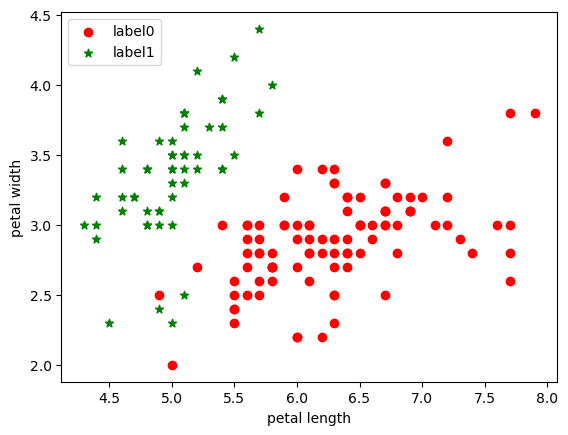

In [27]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans         
from sklearn import datasets
from sklearn.datasets import load_iris    
iris = load_iris()
X = iris.data[:]     
estimator = KMeans(n_clusters=2)       #构造聚类器,这里聚成两类
estimator.fit(X)                       #聚类
label_pred = estimator.labels_         #获取聚类标签
#绘图
x0 = X[label_pred == 0]
x1 = X[label_pred == 1]
plt.scatter(x0[:, 0], x0[:, 1], c = "red", marker='o', label='label0')
plt.scatter(x1[:, 0], x1[:, 1], c = "green", marker='*', label='label1')
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend(loc=2)
plt.show()


## 12.4

In [ ]:
# 鸢尾花分类
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt


# 读入数据集
from sklearn.datasets import load_iris
x_data = load_iris().data
y_data = load_iris().target

# 打乱数据集
np.random.seed(116)
np.random.shuffle(x_data)
np.random.seed(116)
np.random.shuffle(y_data)

# 选择倒数第30之前的数据作为训练集
x_train = x_data[:-30]
y_train = y_data[:-30]
# 选择倒数第30之后的数据作为测试集
x_test  = x_data[-30:]
y_test  = y_data[-30:]

x_train = tf.cast(x_train, tf.float32)
x_test = tf.cast(x_test, tf.float32)

# 分批处理
train_db = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(32)
test_db = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(32)

# 随机初始化待更新的参数
w1 = tf.Variable(tf.random.truncated_normal([4, 3], stddev=0.1))
b1 = tf.Variable(tf.random.truncated_normal([3], stddev=0.1))

lr = 0.2 # 学习率/步长
epoch = 300 # 迭代总次数
loss_all = 0 # 每次迭代的损失
loss_list = [] # 存储每一次迭代的损失
acc_list = [] # 存储每一次迭代结果的准确率
for epoch in range(epoch):
    # 训练 
    # 更新权重
    for step, (x_train, y_train) in enumerate(train_db):
        with tf.GradientTape() as tape:
            # 前向传播得到当前权值下的推理结果 y = x * w1 + b1
            y = tf.matmul(x_train, w1) + b1;
            # 使用softmax将推理结果转换到[0, 1]之间
            y = tf.nn.softmax(y)
            # 将标签转换为独热码，即0:0 0 1, 1:0 1 0, 2:1 0 0
            y_ = tf.one_hot(y_train, depth=3)
            # 求均方误差
            loss = tf.reduce_mean(tf.square(y_ - y))
            loss_all += loss.numpy()
        # 分别对损失函数的w1、b1求偏导
        grads = tape.gradient(loss, [w1, b1])
        
        # 更新w1、b1 w1 = w1 - lr * w1_grad  b1 = b1 - lr * b1_grad
        w1.assign_sub(lr * grads[0])
        b1.assign_sub(lr * grads[1])
    # 打印此次迭代的损失
    print("Ecoph:{}, Loss:{}".format(epoch, loss_all / 4))
    loss_list.append(loss_all / 4)
    loss_all = 0
    
    # 测试
    # 计算此次迭代结果的正确率
    # 在真实训练时可以略过，这里只是为了画出正确率曲线
    total_correct, total_number = 0, 0
    for x_test, y_test in test_db:
        # 前向传播得到当前权值下的推理结果 y = x * w1 + b1
        y = tf.matmul(x_test, w1) + b1
        # 使用softmax将预测结果转换到[0, 1]之间
        y = tf.nn.softmax(y)
        # 找到最大值的索引
        pred = tf.argmax(y, axis=1)
        pred = tf.cast(pred, dtype=y_test.dtype)
        # 将预测结果与真实标签对比
        correct = tf.cast(tf.equal(pred, y_test), dtype=tf.int32)
        correct = tf.reduce_sum(correct)
        total_correct += int(correct)
        total_number += x_test.shape[0]
    acc = total_correct / total_number
    acc_list.append(acc)
    print("Acc:", acc)
    print("-------------------")
    
# 画出损失函数曲线
plt.plot(loss_list)
plt.title("Loss Curve")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()
# 画出正确率曲线
plt.plot(acc_list)
plt.title("Acc Curve")
plt.xlabel("Epoch")
plt.ylabel("Acc")
plt.show()


## 12.5

In [ ]:
# import required libraries
import torch

import torchvision.transforms as transforms

from PIL import Image

 # Read the image

picture = Image.open(r"E:\alice.webp.jpg")

 # Define transform

transform = transforms.Grayscale()

 # Convert the image to grayscale

image = transform(picture)

 # Display

image.show()


## 12.7

mnist_train_LeNet_5.py文件：

In [ ]:
import os

import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import  numpy as np
#加载mnist_inference.py中定义的常量和前向传播的函数。
import mnist_inference_LeNet_5

BATCH_SIZE = 100
LEARNING_RATE_BASE = 0.8 # 最开始的学习率
LEARNING_RATE_DECAY = 0.99 # 在指数衰减学习率的过程中用到
REGULARIZATION_RATE = 0.0001 # 描述模型复杂度的正则化项在损失函数中的系数
TRAINING_STEPS = 30000 # 训练轮数，注意，训练一个Batch就是一个step
MOVING_AVERAGE_DECAY = 0.99 # 滑动平均模型的衰减率，最后我会讲解滑动平均模型
#模型保存的路径和中文名
MODEL_SAVE_PATH = "/path/to/model/"
MODEL_NAME = "model.ckpt"

def train(mnist):
    # 定义输入输出placeholder。
    x = tf.placeholder(tf.float32,[
        BATCH_SIZE, #第一维表示一个batch中样例的个数
        mnist_inference_LeNet_5.IMAGE_SIZE, #第二维和第三维表示图片的尺寸
        mnist_inference_LeNet_5.IMAGE_SIZE,
        mnist_inference_LeNet_5.NUM_CHANNELS],  #第四维表示图片的深度，对于RBG格式的图片，深度为5
        name='x-input')

    y_ = tf.placeholder(tf.float32, [None, mnist_inference_LeNet_5.OUTPUT_NODE], name='y-input')

    regularizer = tf.contrib.layers.l2_regularizer(REGULARIZATION_RATE)
    # 直接使用mnist_inference.py中定义的前向传播过程
    y = mnist_inference_LeNet_5.inference(x,train, regularizer)
    global_step = tf.Variable(0, trainable=False)

    # 定义损失函数、学习率、滑动平均操作以及训练过程
    variable_averages = tf.train.ExponentialMovingAverage(
        MOVING_AVERAGE_DECAY, global_step
    )
    variable_averages_op = variable_averages.apply(
        tf.trainable_variables()
    )
    cross_entropy = tf.nn.sparse_softmax_cross_entropy_with_logits(
        logits=y, labels=tf.argmax(y_, 1)
    )
    cross_entropy_mean = tf.reduce_mean(cross_entropy)
    loss = cross_entropy_mean + tf.add_n(tf.get_collection('losses'))
    learning_rate = tf.train.exponential_decay(
        LEARNING_RATE_BASE,
        global_step,
        mnist.train.num_examples / BATCH_SIZE,
        LEARNING_RATE_DECAY
    )
    train_step = tf.train.GradientDescentOptimizer(learning_rate)\
                   .minimize(loss, global_step=global_step)
    with tf.control_dependencies([train_step, variable_averages_op]):
        train_op = tf.no_op(name='train')

    # 初始化TensorFlow持久化类
    saver = tf.train.Saver()
    with tf.Session() as sess:
        tf.global_variables_initializer().run()

        # 在训练过程中不再测试模型在验证数据上的表现，验证和测试的过程将会有一个独
        # 立的程序来完成。
        for i in range(TRAINING_STEPS):
            xs, ys = mnist.train.next_batch(BATCH_SIZE)
            xs = np.reshape(xs,(
                BATCH_SIZE,
                mnist_inference_LeNet_5.IMAGE_SIZE,
                mnist_inference_LeNet_5.IMAGE_SIZE,
                mnist_inference_LeNet_5.NUM_CHANNELS))

            _, loss_value, step = sess.run([train_op, loss, global_step],
                                           feed_dict={x: xs, y_: ys})
            # 每1000轮保存一次模型
            if i % 1000 == 0:
                # 输出当前的训练情况。这里只输出了模型在当前训练batch上的损失
                # 函数大小。通过损失函数的大小可以大概了解训练的情况。在验证数
                # 据集上正确率的信息会有一个单独的程序来生成
                print("After %d training step(s), loss on training "
                      "batch is %g." % (step, loss_value))
                # 保存当前的模型。注意这里给出了global_step参数，这样可以让每个
                # 被保存的模型的文件名末尾加上训练的轮数，比如“model.ckpt-1000”，
                # 表示训练1000轮之后得到的模型。
                saver.save(
                    sess, os.path.join(MODEL_SAVE_PATH, MODEL_NAME),
                    global_step=global_step
                )
# 主程序入口
def main(argv=None):
    # 声明处理MNIST数据集的类，这个类在初始化时会自动下载数据。
    mnist = input_data.read_data_sets("/path/to/MNIST_data", one_hot=True)
    train(mnist)

# TensorFlow提供的一个主程序入口，tf.app.run会调用上面定义的main函数
if __name__ == "__main__":
    tf.app.run()


mnist_inference_LeNet_5.py文件：

In [ ]:
# _*_ coding: utf-8 _*_
import tensorflow as tf

# 配置神经网络的参数
INPUT_NODE = 784
OUTPUT_NODE = 10

IMAGE_SIZE = 28
NUM_CHANNELS = 1
NUM_LABELS = 10

# 第一个卷积层的尺寸和深度
CONV1_DEEP = 32
CONV1_SIZE = 5
# 第二个卷积层的尺寸和深度
CONV2_DEEP = 64
CONV2_SIZE = 5
# 全连接层的节点个数
FC_SIZE = 512

# 定义卷积神经网络的前向传播过程。这里添加了一个新的参数train，用于区别训练过程和测试过程。在这个程序中将用到dropout方法
# dropout可以进一步提升模型可靠性并防止过拟合（dropout过程只在训练时使用）
def inference(input_tensor, train, regularizer):
    with tf.variable_scope('layer1-conv1'):
        conv1_weights = tf.get_variable('weight', [CONV1_SIZE, CONV1_SIZE, NUM_CHANNELS, CONV1_DEEP],
                                        initializer=tf.truncated_normal_initializer(stddev=0.1))
        conv1_biases = tf.get_variable('bias', [CONV1_DEEP],
                                       initializer=tf.constant_initializer(0.0))
        conv1 = tf.nn.conv2d(input_tensor, conv1_weights, strides=[1, 1, 1, 1], padding='SAME')
        relu1 = tf.nn.relu(tf.nn.bias_add(conv1, conv1_biases))

    with tf.name_scope('layer2-pool1'):
        pool1 = tf.nn.max_pool(relu1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

    with tf.variable_scope('layer3-conv2'):
        conv2_weights = tf.get_variable('weight', [CONV2_SIZE, CONV2_SIZE, CONV1_DEEP, CONV2_DEEP],
                                        initializer=tf.truncated_normal_initializer(stddev=0.1))
        conv2_biases = tf.get_variable('bias', [CONV2_DEEP],
                                       initializer=tf.constant_initializer(0.0))
        conv2 = tf.nn.conv2d(pool1,conv2_weights, strides=[1, 1, 1, 1], padding='SAME')
        relu2 = tf.nn.relu(tf.nn.bias_add(conv2, conv2_biases))

    with tf.name_scope('layer4-pool2'):
        pool2 = tf.nn.max_pool(relu2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

    pool2_shape = pool2.get_shape().as_list()
    nodes = pool2_shape[1] * pool2_shape[2] * pool2_shape[3]

    reshaped = tf.reshape(pool2, [pool2_shape[0], nodes])

    with tf.variable_scope('layer5-fc1'):
        fc1_weights = tf.get_variable('weight', [nodes, FC_SIZE],
                                      initializer=tf.truncated_normal_initializer(stddev=0.1))
        if regularizer != None:
            tf.add_to_collection('losses', regularizer(fc1_weights))
        fc1_biases = tf.get_variable('bias', [FC_SIZE],
                                     initializer=tf.constant_initializer(0.0))
        fc1 = tf.nn.relu(tf.matmul(reshaped, fc1_weights) + fc1_biases)
        if train:
            fc1 = tf.nn.dropout(fc1, 0.5)

    with tf.variable_scope('layer6-fc2'):
        fc2_weights = tf.get_variable('weight', [FC_SIZE, NUM_LABELS],
                                      initializer=tf.truncated_normal_initializer(stddev=0.1))
        if regularizer != None:
            tf.add_to_collection('losses', regularizer(fc2_weights))
        fc2_biases = tf.get_variable('bias', [NUM_LABELS],
                                     initializer=tf.constant_initializer(0.0))
        logit = tf.matmul(fc1, fc2_weights) + fc2_biases

    return logit



## 12.8

In [ ]:
#加载数据集
import tensorflow as tf
mnist = tf.keras.datasets.mnist
train, test = mnist.load_data()


In [ ]:
#将数据按照batch提供给网络模型
import numpy as np

class MNISTData:
    def __init__(self, data, need_shuffle, batch_size=128):
         """
        :param datas: 数据集，格式为 data,label
        :param shuffle: 是否随机打乱数据 True or False
        :param batch_size: 一批数据大小
        """
        self._data = data[0]
        self._labels = data[1]
        self.num_examples = self._data.shape[0]
        self._need_shuffle = need_shuffle
        self._indicator = 0
        self._batch_size = batch_size
        if self._need_shuffle:
            self._shuffle_data()

    def __iter__(self):
        return self

    def _shuffle_data(self):
        p = np.random.permutation(self.num_examples)
        self._data = self._data[p]
        self._labels = self._labels[p]

    def next_batch(self):
        end_indicator = self._indicator + self._batch_size
        if end_indicator > self.num_examples:
            if self._need_shuffle:
                self._shuffle_data()
                self._indicator = 0
                end_indicator = self._batch_size
            else:
                self._indicator = 0
                end_indicator = self._batch_size
        if end_indicator > self.num_examples:
            raise StopIteration
        batch_data = self._data[self._indicator: end_indicator] / 255.0 # 归一化
        batch_labels = self._labels[self._indicator: end_indicator]
        self._indicator = end_indicator

        return batch_data, batch_labels

    def __next__(self):
        return self.next_batch()
        
train_dataset = dataset.MNISTData(train, True)
test_dateset = dataset.MNISTData(test, False)


In [ ]:
#查看数据集
def display(train_images, train_labels):
    plt.figure(figsize=(10,10))
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(train_images[i], cmap=plt.cm.binary)
        plt.xlabel(train_labels[i])
    plt.show()
    
for data in train_dataset:
    display(*data)


In [ ]:
#使用tensorflow中的keras搭建网络结构，激活函数使用Mish
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import *
from tensorflow.keras.utils import get_custom_objects


class Mish(Activation):
    def __init__(self, activate, **kwargs):
        super(Mish, self).__init__(activate, **kwargs)
        self.__name__ = "Mish"


def mish(inputs):
    return inputs * tf.math.tanh(tf.math.softplus(inputs))


def LeNet5(input_shape=[32, 32, 3]):
	get_custom_objects().update({'Mish': Mish(mish)})
	#输入层
    inputs = Input(shape=input_shape)
	#第一个卷积-池化层
    conv1 = Conv2D(6, 5, activation="relu", padding='same')(inputs)
    pool1 = MaxPooling2D((2, 2))(conv1)
    #第二个卷积-池化层
    conv2 = Conv2D(16, 5, activation="relu", padding='same')(pool1)
    pool2 = MaxPooling2D((2, 2))(conv2)
    #第三个卷积层
    conv2 = Conv2D(120, 5, activation="relu", padding='same')(pool2)
    fc = Flatten()(conv2)
	#全连接层
    fc1 = Dense(120, activation="relu")(fc)
    #输出层
    fc2 = Dense(10, activation="softmax")(fc1)
    model = Model(inputs, fc2)

    return model
model = LeNet5(input_shape=[28, 28, 1])


In [ ]:
#定义损失函数以及优化器
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)


In [ ]:
#保存模型
model_filepath = 'model/'
checkpoint_filepath = model_filepath + 'tmp/'
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_best_only=True,
    save_weights_only=True,
    monitor='accuracy',
    mode='max'
)


In [ ]:
#模型训练
# 是否使用GPU
use_gpu = True
tf.debugging.set_log_device_placement(True)
if use_gpu:
    gpus = tf.config.experimental.list_physical_devices(device_type='GPU')
    if gpus:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(device=gpu, enable=True)
            tf.print(gpu)

    else:
        os.environ["CUDA_VISIBLE_DEVICE"] = "-1"

else:
    os.environ["CUDA_VISIBLE_DEVICE"] = "-1"

# TensorBoard可视化工具
log_path = 'logging/'
logging = tf.keras.callbacks.TensorBoard(log_dir=log_path)
model_filepath = 'model/'
checkpoint_filepath = model_filepath + 'tmp/'
history = model.fit(
    train_dataset,
    epochs=10,
    steps_per_epoch=train_dataset.num_examples // BATCH_SIZE + 1,
    validation_data=test_dateset,
    validation_steps=test_dateset.num_examples // BATCH_SIZE + 1,
    callbacks=[cp_callback, logging ]
)

model.load_weights(checkpoint_filepath)
model.save(model_filepath + 'model')


In [ ]:
#模型固化
import tensorflow as tf
from tensorflow.python.framework.convert_to_constants import convert_variables_to_constants_v2

def export_frozen_graph(model, name, input_size) :
	f = tf.function(lambda x: model(x))
	f = f.get_concrete_function(x=tf.TensorSpec(shape=[None, input_size[0], input_size[1], input_size[2]], dtype=tf.float32))
	f2 = convert_variables_to_constants_v2(f)
	graph_def = f2.graph.as_graph_def()

	# Export frozen graph
	with tf.io.gfile.GFile(name, 'wb') as f:
		f.write(graph_def.SerializeToString())
		
export_frozen_graph(model, model_filepath + 'frozen_graph.pb', (input_size, input_size, 1))
